In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2

# Connecting to the postgres database
conn = psycopg2.connect(
    dbname ="videogame_data",
    user = "postgres",
    password = "5har3acup",
    host = "localhost",
    port = "5432"
)

# Open a courser to perform database operations
cur = conn.cursor()

# Starting Pandas
videogames_df = pd.read_csv("videogame_data.csv")

In [2]:
# Showing all the data from the table
cur.execute("""SELECT *
FROM videogame_data""")
cur.fetchall()

[(1,
  'Wii Sports',
  'Wii',
  2006,
  'Sports',
  'Nintendo',
  41.49,
  29.02,
  3.77,
  8.46,
  82.74),
 (2,
  'Super Mario Bros.',
  'NES',
  1985,
  'Platform',
  'Nintendo',
  29.08,
  3.58,
  6.81,
  0.77,
  40.24),
 (3,
  'Mario Kart Wii',
  'Wii',
  2008,
  'Racing',
  'Nintendo',
  15.85,
  12.88,
  3.79,
  3.31,
  35.82),
 (4,
  'Wii Sports Resort',
  'Wii',
  2009,
  'Sports',
  'Nintendo',
  15.75,
  11.01,
  3.28,
  2.96,
  33.0),
 (5,
  'Pokemon Red/Pokemon Blue',
  'GB',
  1996,
  'Role-Playing',
  'Nintendo',
  11.27,
  8.89,
  10.22,
  1.0,
  31.37),
 (6,
  'Tetris',
  'GB',
  1989,
  'Puzzle',
  'Nintendo',
  23.2,
  2.26,
  4.22,
  0.58,
  30.26),
 (7,
  'New Super Mario Bros.',
  'DS',
  2006,
  'Platform',
  'Nintendo',
  11.38,
  9.23,
  6.5,
  2.9,
  30.01),
 (8,
  'Wii Play',
  'Wii',
  2006,
  'Misc',
  'Nintendo',
  14.03,
  9.2,
  2.93,
  2.85,
  29.02),
 (9,
  'New Super Mario Bros. Wii',
  'Wii',
  2009,
  'Platform',
  'Nintendo',
  14.59,
  7.06,
  4.7,

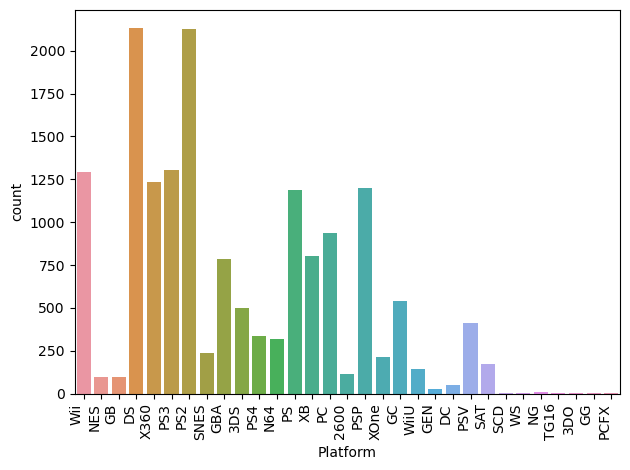

In [14]:
# 7. Most used platform of the year 
platforms = sns.countplot(x= "Platform", data = videogames_df)
platforms.set_xticklabels(platforms.get_xticklabels(), rotation = 90, ha= "right")
plt.tight_layout()
plt.show()

In [12]:
# 7. Most used platform of the year (query)
cur.execute("""SELECT platform, SUM(global_sales)
FROM videogame_data
GROUP BY platform
ORDER BY sum DESC;""")
cur.fetchall()

[('PS2', 1238.6899999999853),
 ('X360', 969.5999999999993),
 ('PS3', 949.3499999999987),
 ('Wii', 909.8099999999976),
 ('DS', 818.9099999999876),
 ('PS', 727.3899999999971),
 ('GBA', 305.6199999999987),
 ('PSP', 291.7099999999948),
 ('PS4', 278.0999999999994),
 ('PC', 254.70000000000104),
 ('GB', 254.41999999999987),
 ('XB', 252.09000000000069),
 ('NES', 251.06999999999988),
 ('3DS', 246.27000000000007),
 ('N64', 218.20999999999987),
 ('SNES', 200.05000000000024),
 ('GC', 197.1400000000007),
 ('XOne', 141.05999999999995),
 ('2600', 86.57000000000005),
 ('WiiU', 81.86000000000006),
 ('PSV', 61.60000000000005),
 ('SAT', 33.59000000000002),
 ('GEN', 28.360000000000003),
 ('DC', 15.969999999999997),
 ('SCD', 1.8700000000000003),
 ('NG', 1.4400000000000004),
 ('WS', 1.42),
 ('TG16', 0.16),
 ('3DO', 0.1),
 ('GG', 0.04),
 ('PCFX', 0.03)]

In [17]:
    # 1. Which competitors (publisher) the company should look at when launching a new product?
    # Which publisher records higher sales?
cur.execute("""SELECT platform, 
CASE 
WHEN year BETWEEN 1980 AND 1989 THEN '1980s'
WHEN year BETWEEN 1990 AND 1999 THEN '1990s'
WHEN year BETWEEN 2000 AND 2009 THEN '2000s'
WHEN year BETWEEN 2010 AND 2019 THEN '2010s'
WHEN year BETWEEN 2020 AND 2029 THEN '2020s'
END AS decade,
SUM(global_sales) AS total_sales
FROM videogame_data
WHERE year BETWEEN 1980 AND 2029
GROUP BY platform, decade
ORDER BY decade, total_sales DESC;""")
cur.fetchall()

[('NES', '1980s', 223.5199999999999),
 ('2600', '1980s', 86.57000000000005),
 ('GB', '1980s', 66.41),
 ('PC', '1980s', 0.06),
 ('DS', '1980s', 0.02),
 ('PS', '1990s', 586.8499999999987),
 ('SNES', '1990s', 200.05000000000024),
 ('N64', '1990s', 180.86000000000004),
 ('GB', '1990s', 159.00999999999993),
 ('PC', '1990s', 49.98),
 ('SAT', '1990s', 33.59000000000002),
 ('GEN', '1990s', 28.360000000000003),
 ('NES', '1990s', 27.55),
 ('DC', '1990s', 8.560000000000002),
 ('SCD', '1990s', 1.8700000000000003),
 ('NG', '1990s', 1.4400000000000004),
 ('WS', '1990s', 0.46),
 ('TG16', '1990s', 0.16),
 ('3DO', '1990s', 0.1),
 ('GG', '1990s', 0.04),
 ('PCFX', '1990s', 0.03),
 ('PS2', '2000s', 1232.5899999999854),
 ('DS', '2000s', 689.2499999999914),
 ('Wii', '2000s', 677.4799999999991),
 ('X360', '2000s', 412.64999999999947),
 ('PS3', '2000s', 346.9099999999996),
 ('GBA', '2000s', 305.6199999999987),
 ('XB', '2000s', 252.09000000000069),
 ('PSP', '2000s', 227.44000000000042),
 ('GC', '2000s', 197.14

In [18]:
# How much is the global sales per year by publisher?
cur.execute("""SELECT year, publisher, SUM(global_sales) AS total_sales
FROM videogame_data
GROUP BY year, publisher
ORDER BY year, total_sales DESC;""")
cur.fetchall()

[(1980, 'Atari', 8.36),
 (1980, 'Activision', 3.02),
 (1981, 'Activision', 8.5),
 (1981, 'Atari', 8.450000000000001),
 (1981, 'Imagic', 4.82),
 (1981, 'Parker Bros.', 3.3500000000000005),
 (1981, 'Coleco', 2.7899999999999996),
 (1981, 'Mattel Interactive', 2.53),
 (1981, '20th Century Fox Video Games', 1.35),
 (1981, 'Tigervision', 1.14),
 (1981, 'Mystique', 0.82),
 (1981, 'Men-A-Vision', 0.77),
 (1981, 'Data Age', 0.39),
 (1981, 'Starpath Corp.', 0.33),
 (1981, 'Unknown', 0.29),
 (1981, 'Taito', 0.24),
 (1982, 'Atari', 19.43),
 (1982, 'Activision', 1.8599999999999999),
 (1982, 'Parker Bros.', 1.12),
 (1982, 'Quelle', 0.87),
 (1982, 'Universal Gamex', 0.63),
 (1982, 'Wizard Video Games', 0.62),
 (1982, '20th Century Fox Video Games', 0.5900000000000001),
 (1982, 'CPG Products', 0.54),
 (1982, 'Answer Software', 0.5),
 (1982, 'Sega', 0.4),
 (1982, 'Mattel Interactive', 0.39),
 (1982, 'ITT Family Games', 0.34),
 (1982, 'Data Age', 0.32),
 (1982, 'CBS Electronics', 0.31),
 (1982, 'Tigervi

In [6]:
# 5. The total sales per area by year. (NA, EU, JP, Others) (Table)
cur.execute("""SELECT year, sum(na_sales) AS total_na, sum(eu_sales) AS total_eu, sum(jp_sales) AS total_jp, sum(other_sales) AS total_other
FROM videogame_data
GROUP BY year
ORDER BY year DESC;""")
cur.fetchall()

[(2020, 0.27, 0.0, 0.0, 0.02),
 (2017, 0.0, 0.0, 0.05, 0.0),
 (2016,
  22.66000000000006,
  26.760000000000066,
  13.66999999999997,
  7.749999999999982),
 (2015,
  102.81999999999992,
  97.71000000000002,
  33.72000000000013,
  30.010000000000133),
 (2014, 131.9700000000002, 125.6300000000001, 39.460000000000086, 40.02),
 (2013,
  154.7700000000001,
  125.80000000000004,
  47.59000000000005,
  39.82000000000001),
 (2012, 154.93000000000004, 118.76000000000002, 51.74000000000012, 37.82),
 (2011,
  241.0000000000009,
  167.31000000000023,
  53.040000000000084,
  54.38999999999983),
 (2010, 304.24, 176.57000000000016, 59.490000000000215, 59.89999999999995),
 (2009,
  338.8499999999989,
  191.5899999999998,
  61.88999999999998,
  74.77000000000145),
 (2008,
  351.43999999999915,
  184.3999999999998,
  60.26000000000002,
  82.39000000000141),
 (2007,
  311.1799999999983,
  160.17999999999972,
  60.290000000000106,
  77.58000000000102),
 (2006,
  263.11999999999887,
  129.23999999999984,
  

C:\Users\HP-PRO 10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP-PRO 10\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


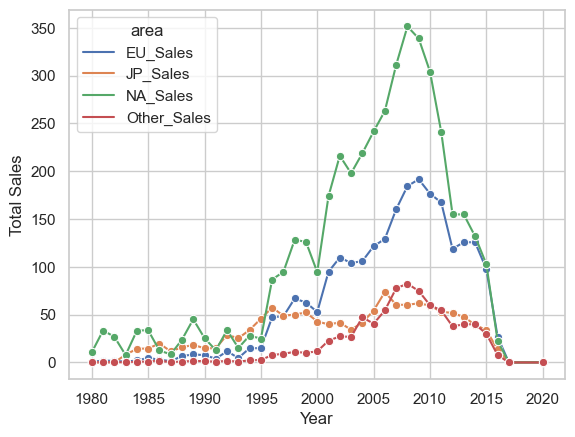

In [41]:
# 5. The total sales per area by year. (NA, EU, JP, Others) (Multiple Line graph)
videogames_area = pd.melt(videogames_df, id_vars=['Year'], value_vars = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
                          var_name='area', value_name='total_sales')
# summing the sales per year per area
videogame_area2 = videogames_area.groupby(['Year', 'area']).total_sales.sum().reset_index()
#plotting
sns.set(style="whitegrid")
sns.lineplot(data=videogame_area2, x='Year', y='total_sales', hue='area', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()